## H2O MOJO Tree Visualization
You must have the following installed in your machine:
1. GraphViz (OSX: brew install graphviz)
2. subprocess (pip install subprocess

Content:
 - Detailed Blog: https://aichamp.wordpress.com/2017/09/27/visualizing-h2o-gbm-and-random-forest-mojo-models-trees-in-python/
 - Detailed Documentation: http://docs.h2o.ai/h2o/latest-stable/h2o-genmodel/javadoc/overview-summary.html#viewing-a-mojo

In [2]:
import h2o

In [3]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_101"; Java(TM) SE Runtime Environment (build 1.8.0_101-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.101-b13, mixed mode)
  Starting server from /Users/avkashchauhan/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/x7/331tvwcd6p17jj9zdmhnkpyc0000gn/T/tmpm62rik0l
  JVM stdout: /var/folders/x7/331tvwcd6p17jj9zdmhnkpyc0000gn/T/tmpm62rik0l/h2o_avkashchauhan_started_from_python.out
  JVM stderr: /var/folders/x7/331tvwcd6p17jj9zdmhnkpyc0000gn/T/tmpm62rik0l/h2o_avkashchauhan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster version:,3.14.0.2
H2O cluster version age:,1 month and 5 days
H2O cluster name:,H2O_from_python_avkashchauhan_rdavna
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [4]:
df = h2o.import_file('https://raw.githubusercontent.com/h2oai/sparkling-water/master/examples/smalldata/prostate.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
y = 'CAPSULE'
x = df.col_names
x.remove(y)

In [16]:
print("Response  : " + y)
print("Predictors: " + str(x))

Response  : CAPSULE
Predictors: ['ID', 'AGE', 'RACE', 'DPROS', 'DCAPS', 'PSA', 'VOL', 'GLEASON']


In [17]:
df[y] = df[y].asfactor()

In [18]:
df.describe()

Rows:380
Cols:9




,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,enum,int,int,int,int,real,real,int
mins,1.0,,43.0,0.0,1.0,1.0,0.3,0.0,0.0
mean,190.5,,66.03947368421049,1.0868421052631572,2.2710526315789488,1.1078947368421048,15.408631578947375,15.812921052631573,6.3842105263157904
maxs,380.0,,79.0,2.0,4.0,2.0,139.70000000000002,97.60000000000001,9.0
sigma,109.84079387914127,,6.527071269173311,0.3087732580252793,1.0001076181502861,0.3106564493514939,19.99757266856046,18.347619967271175,1.0919533744261092
zeros,0,,0,3,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0,65.0,1.0,2.0,1.0,1.4000000000000001,0.0,6.0
1,2.0,0,72.0,1.0,3.0,2.0,6.7,0.0,7.0
2,3.0,0,70.0,1.0,1.0,2.0,4.9,0.0,6.0


In [7]:
train, valid, test = df.split_frame(ratios=[.8,.1])

In [8]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [9]:
gbm_cv3 = H2OGradientBoostingEstimator(nfolds=3)

In [82]:
gbm_cv3.train(x=x, y=y, training_frame=train, validation_frame= valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [96]:
gbm_cv3.predict(test_data=test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.918937,0.0810629
1,0.0917478,0.908252
0,0.948085,0.0519148
0,0.94496,0.0550402
0,0.97904,0.0209604
0,0.70363,0.29637
1,0.197067,0.802933
1,0.0688816,0.931118
0,0.939625,0.0603747
1,0.399162,0.600838


In [101]:
all_models = gbm_cv3.cross_validation_models()
print("Total cross validation models: " + str(len(all_models)))

Total cross validation models: 3


In [100]:
# This is how you get the model ID for the Cross Validation models
print(all_models[0].model_id)
print(all_models[1].model_id)
print(all_models[2].model_id)

GBM_model_python_1506563105852_1542_cv_1
GBM_model_python_1506563105852_1542_cv_2
GBM_model_python_1506563105852_1542_cv_3


In [21]:
mojo_file_name = "/Users/avkashchauhan/Downloads/my_gbm_mojo.zip"
gbm_cv3.download_mojo(mojo_file_name)

'/Users/avkashchauhan/Downloads/my_gbm_mojo.zip'

In [42]:
import subprocess
from IPython.display import Image

def generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_path, tree_id = 0):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["java",  "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_id), "-i",  mojo_full_path , "-o", gv_file_path ], shell=False)
    result = subprocess.call(["ls",gv_file_path], shell = False)
    if result is 0:
        print("Success: Graphviz file " + gv_file_path + " is generated.")
    else:    
        print("Error: Graphviz file " + gv_file_path + " could not be generated.")
        

# -------------------        
# I had to do in 2 steps. If I put all in 1 step the process hung after graphviz is created. Still investigating
# -------------------
def generateTreeImage(gv_file_path, image_file_path, tree_id):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    if result is 0:
        print("Success: Image File " + image_file_path + " is generated.")
        print("Now you can execute the follow line as-it-is to see the tree graph:") 
        print("Image(filename='" + image_file_path + "\')")
    else:
        print("Error: Image file " + image_file_path + " could not be generated.")
    
#Call above function with various parameters  

In [33]:
h2o_jar_path= '/Users/avkashchauhan/tools/h2o-3/h2o-3.14.0.3/h2o.jar'
mojo_full_path = mojo_file_name
gv_file_path = "/Users/avkashchauhan/Downloads/my_gbm_graph.gv"
image_file_name = "/Users/avkashchauhan/Downloads/my_gbm_tree"
# Based on Tree ID the image file will have my_gbm_tree_ID.png file name

In [60]:
# Note just change the tree id in the function below to get which particular tree you want
generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_name, 3)

Success: Graphviz file /Users/avkashchauhan/Downloads/my_gbm_graph.gv is generated.


In [61]:
generateTreeImage(gv_file_path, image_file_name,  3)
# Note: If this step hangs, you can look at "dot" active process in osx and try killing it

Success: Image File /Users/avkashchauhan/Downloads/my_gbm_tree_3.png is generated.
Now you can execute the follow line as-it-is to see the tree graph:
Image(filename='/Users/avkashchauhan/Downloads/my_gbm_tree_3.png')


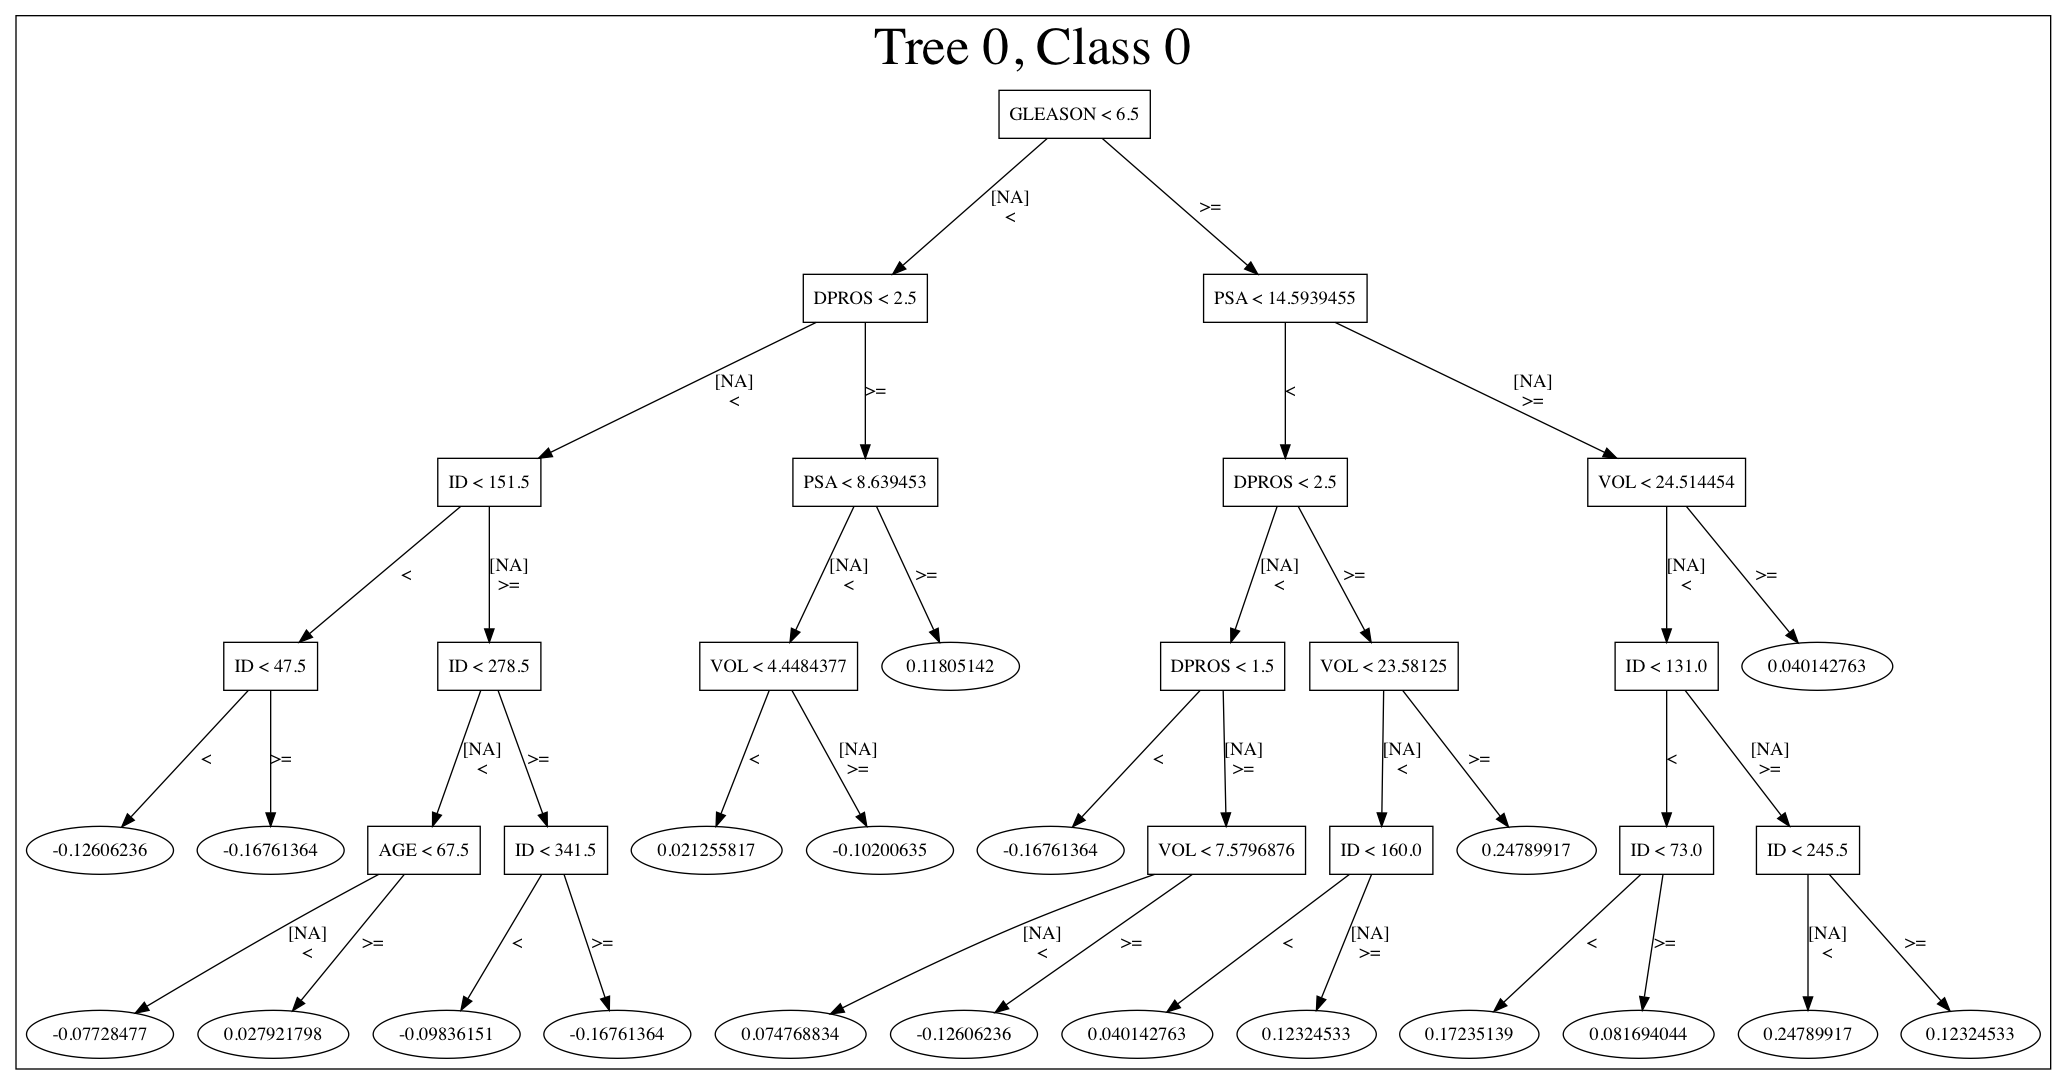

In [57]:
# Just pass the Tree Image file name depending on your tree
Image(filename='/Users/avkashchauhan/Downloads/my_gbm_tree_0.png')

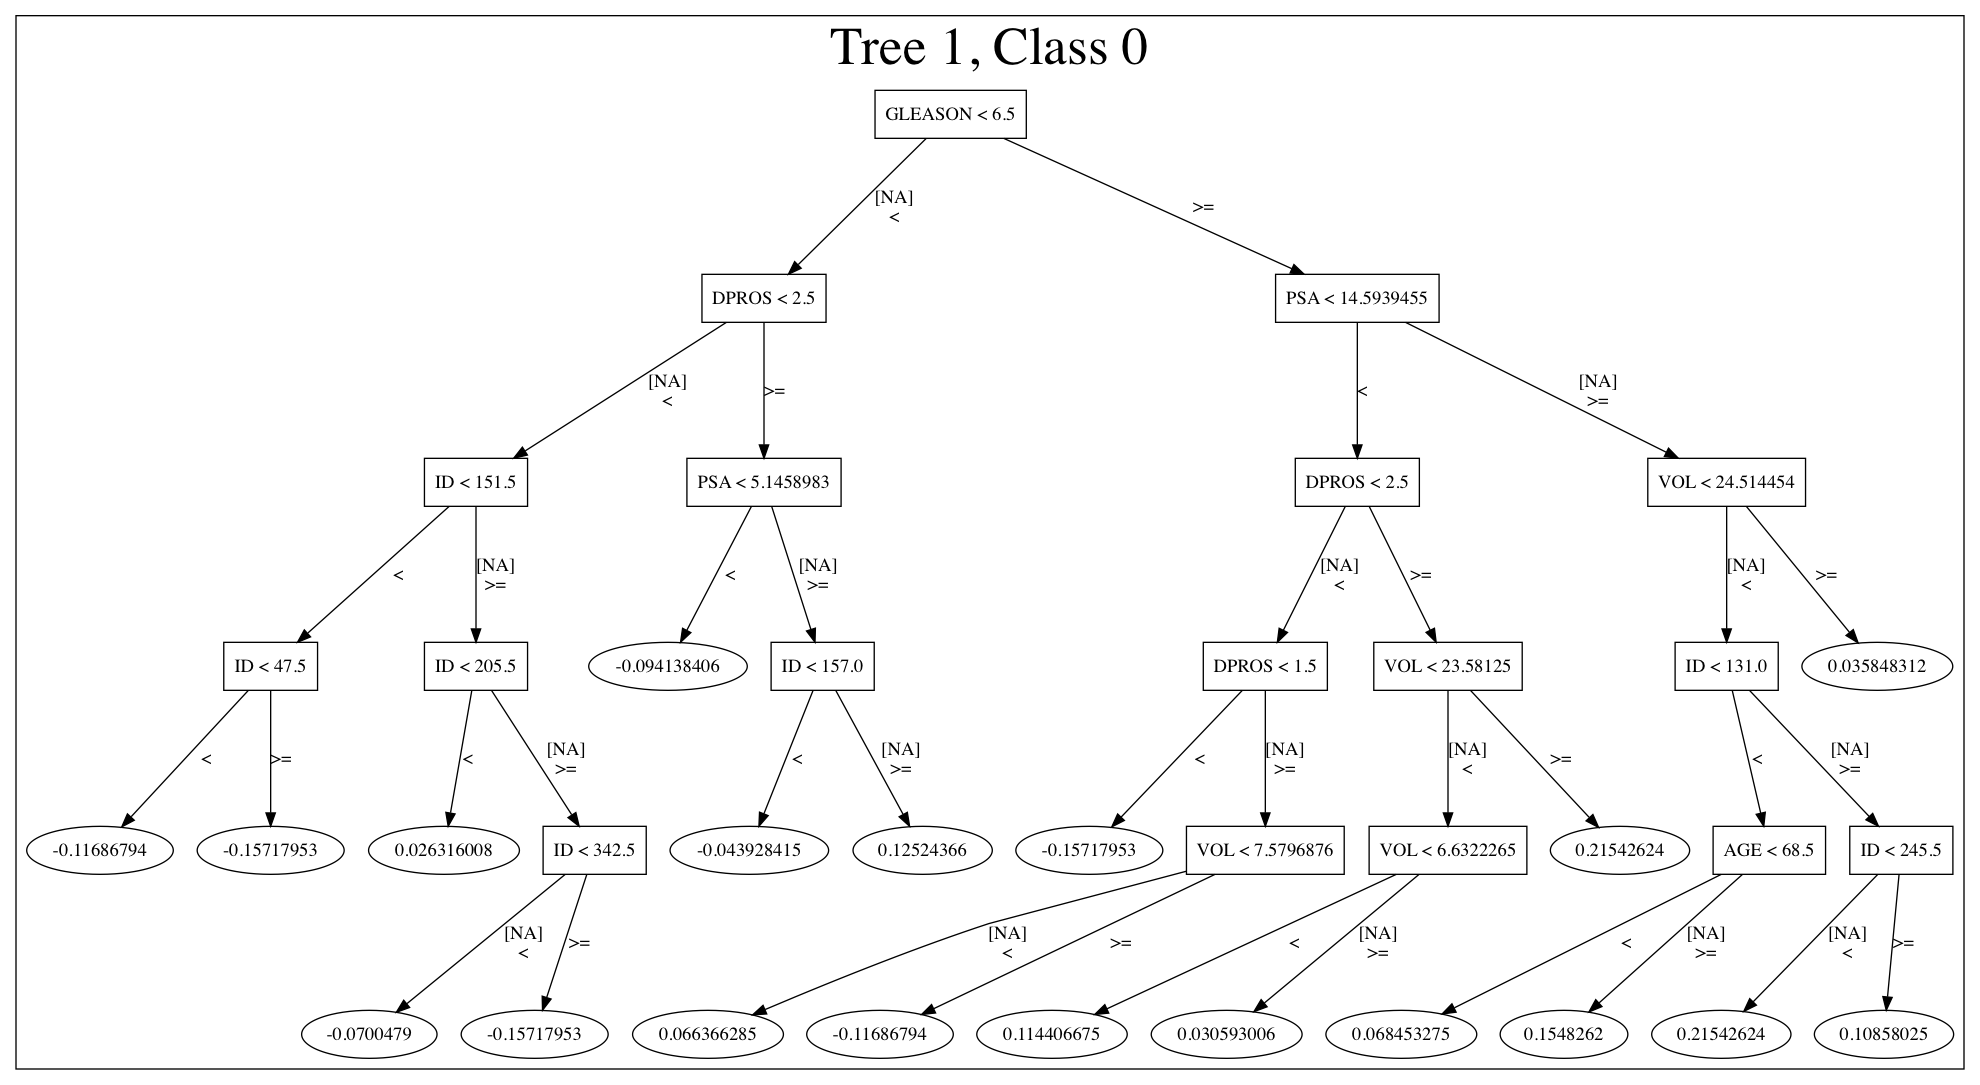

In [58]:
# Just pass the Tree Image file name depending on your tree
Image(filename='/Users/avkashchauhan/Downloads/my_gbm_tree_1.png')

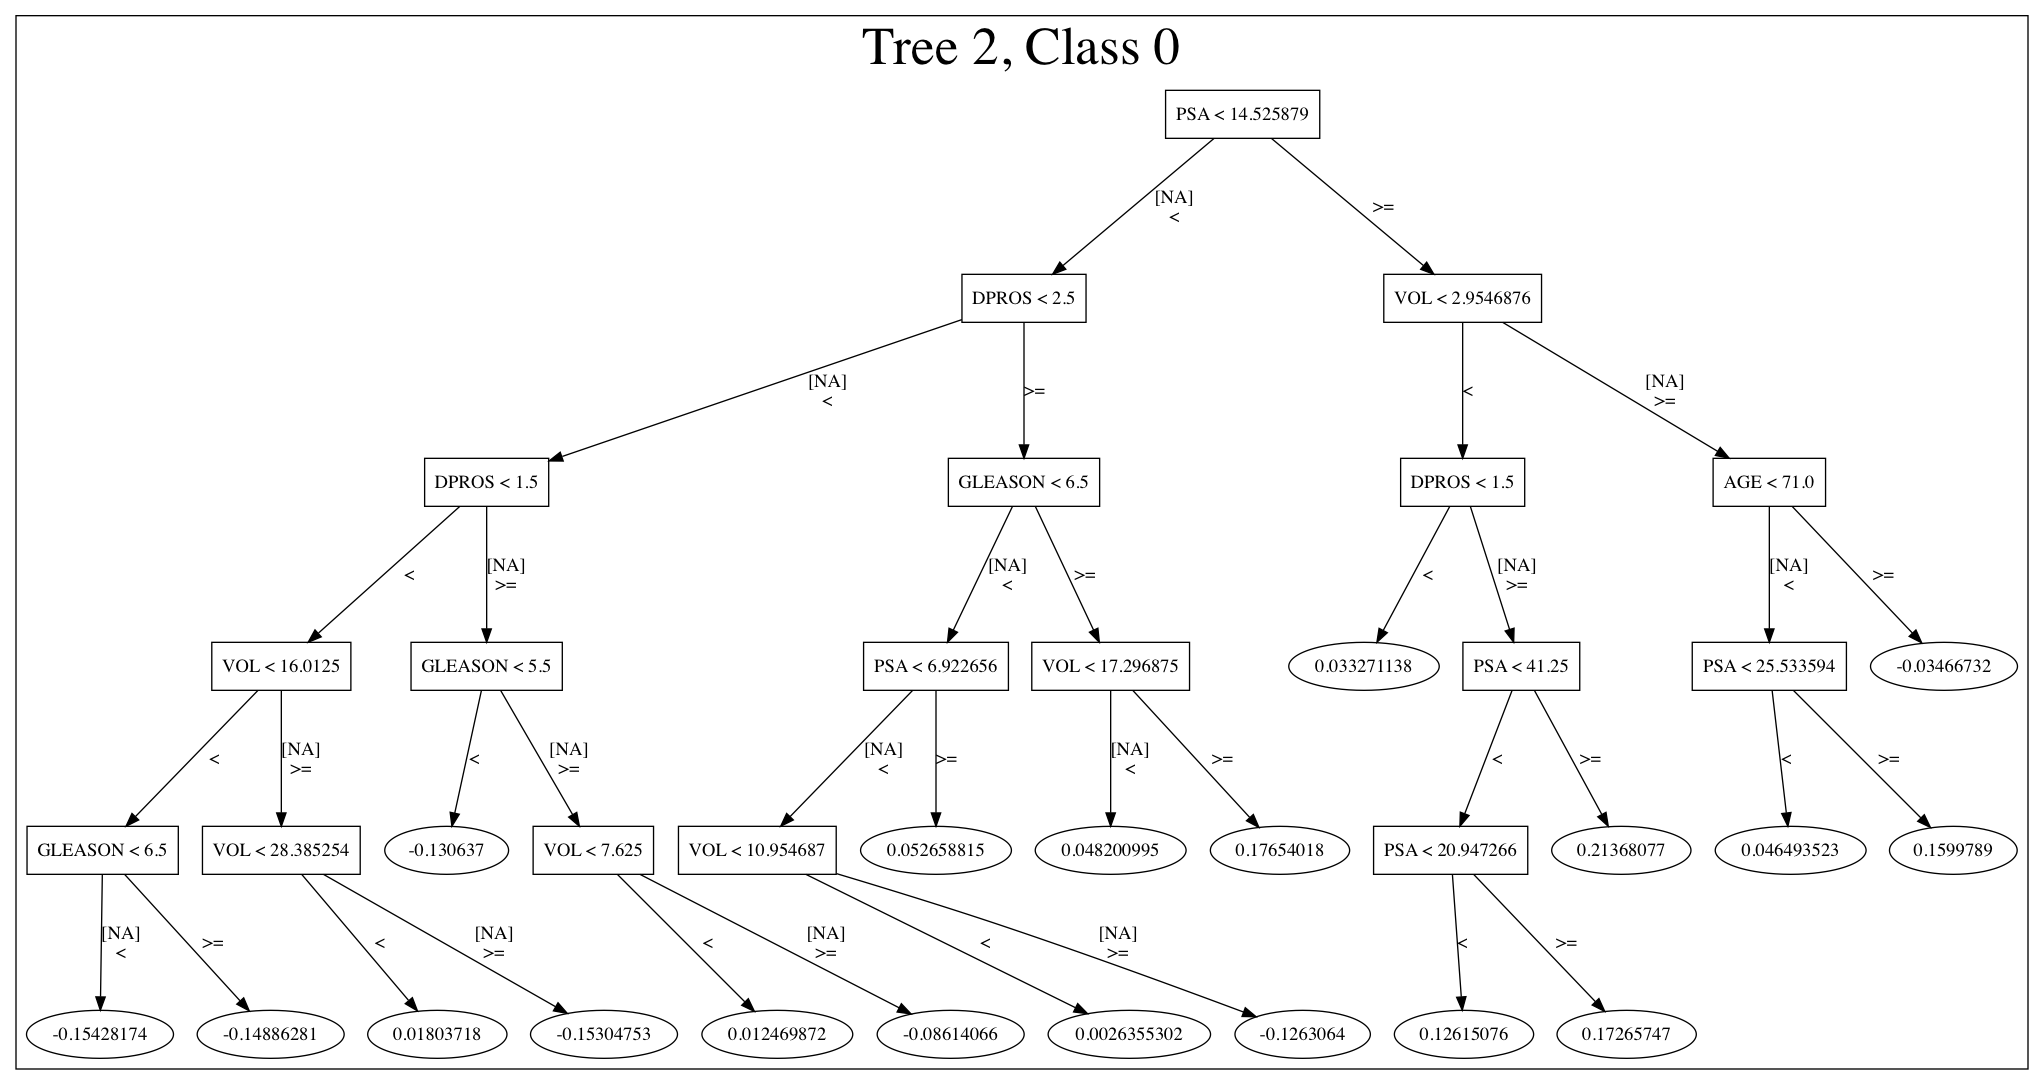

In [59]:
# Just pass the Tree Image file name depending on your tree
Image(filename='/Users/avkashchauhan/Downloads/my_gbm_tree_2.png')

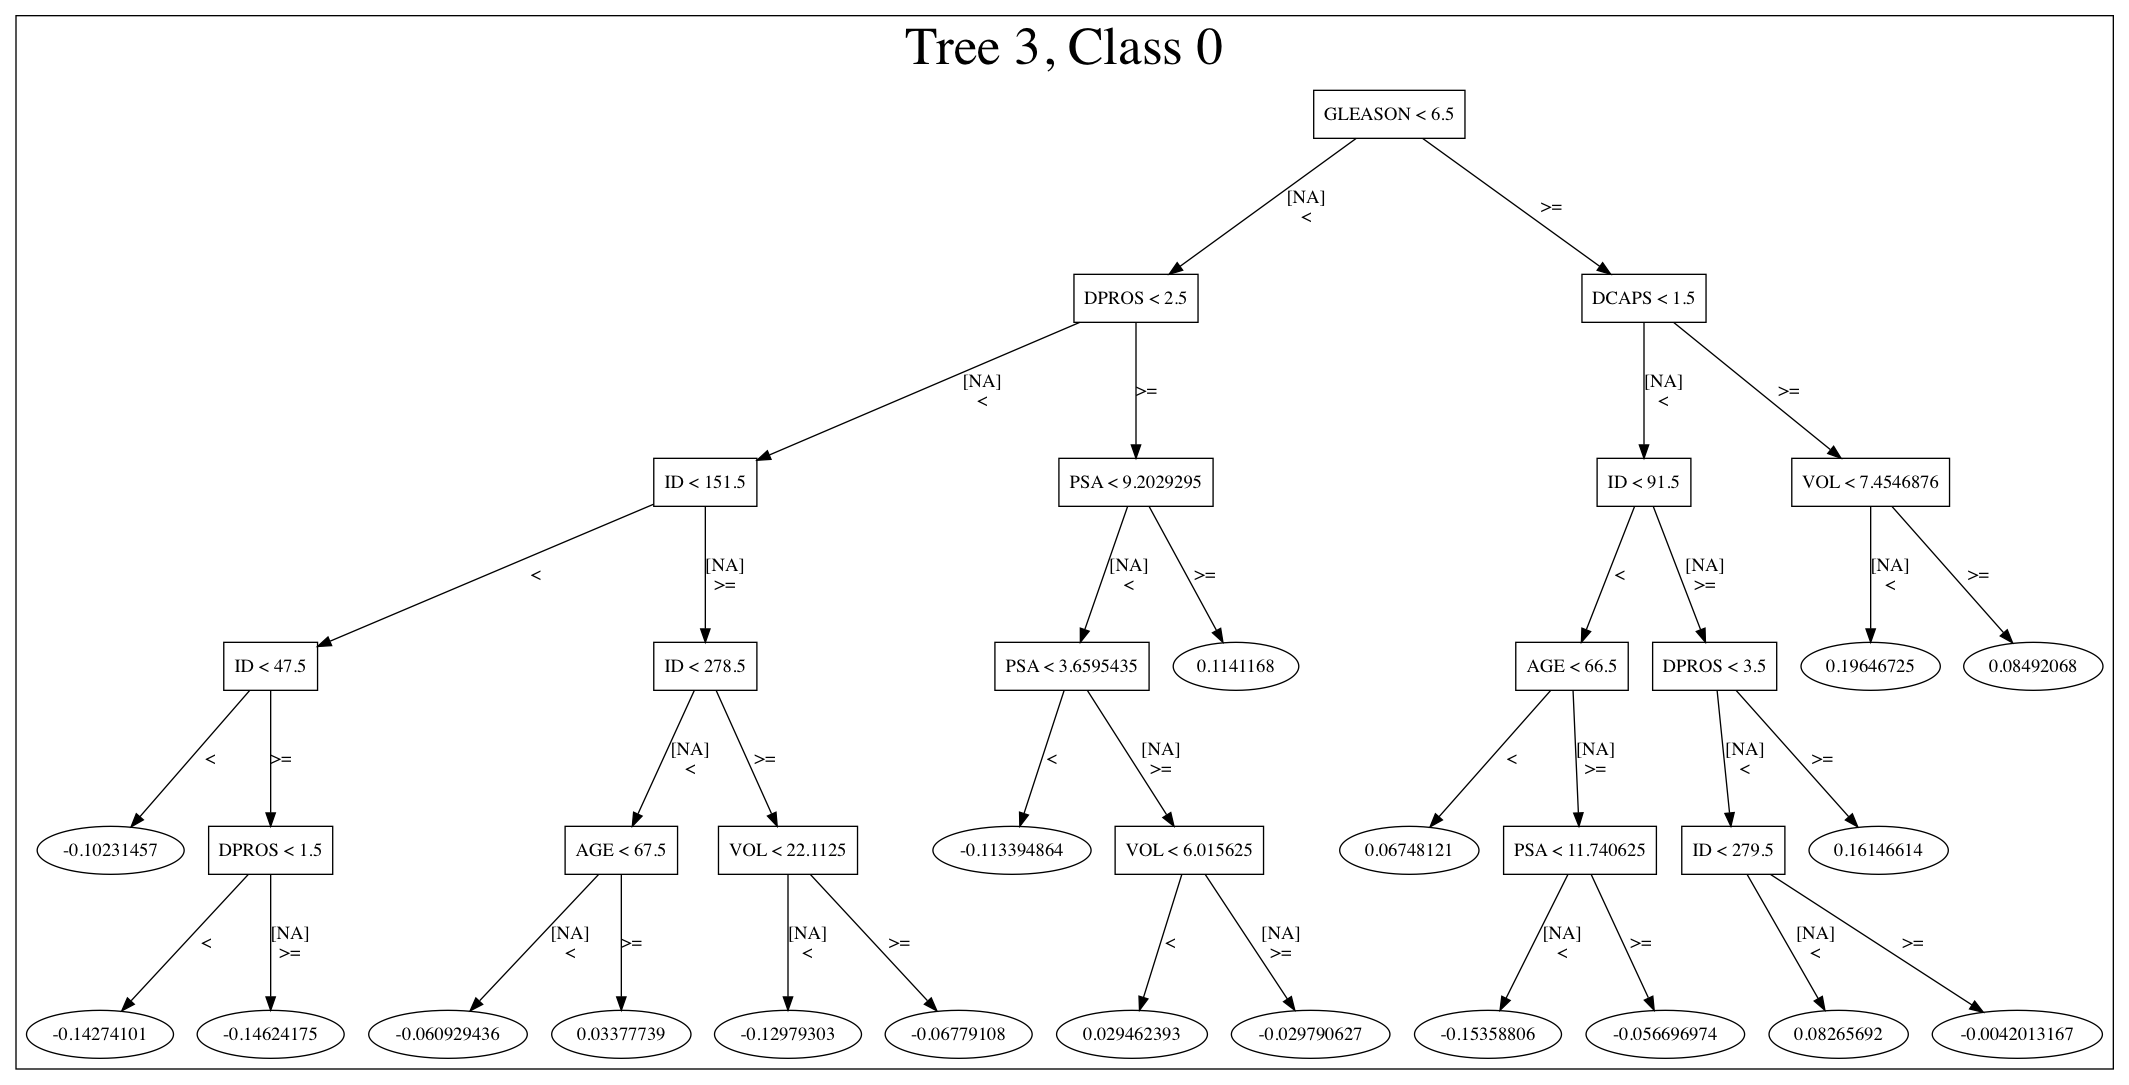

In [62]:
# Just pass the Tree Image file name depending on your tree
Image(filename='/Users/avkashchauhan/Downloads/my_gbm_tree_3.png')